This Notebook is the result of the new concepts I've learnt in the [introductory](https://www.kaggle.com/learn/intro-to-machine-learning) and [intermediate](https://www.kaggle.com/learn/intermediate-machine-learning) ML micro-courses on Kaggle. 

<u>Key concepts:</u>
+ List/Dict comprehension.
+ Imputation of missing values with `SimpleImputer()` method from sklearn.
+ One-Hot Encoding of categorical variables with `OneHotEncoder` class of sklearn.
+ Ensemble the preprocessing concepts with the `ColumTransformer` from sklearn.
+ Use Cross-Validation on the hyperparameter searching step. 
+ Optimized a XGBoost Regression model for the prediction of sale prices. Used the implementation of the scikit-learn API.
+ With the `Pipeline` from sklearn I've ensambled the preprocessing steps with the model.


In [42]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor

# Read the data
df = pd.read_csv('train.csv', index_col='Id') 
X_test = pd.read_csv('test.csv', index_col='Id')

In [43]:
X_test.shape, df.shape

((1459, 79), (1460, 80))

In [44]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [46]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Preprocessing

+ **Drop features** with a significant amount of **null entries**. I've concidered significant at this point as > 25%.
+ I'll use the OH-Encoding aproach on the categorical variables. Thus, I'm going to **drop features with high cardinality** in order to not have a huge number of features at the final dataset. I've concidered high cardinality as >= 10.
+ **Remove** from the training set the rows with a **missing target (a.k.a. *SalePrice*) entries**.
+ Replace **missing values** adding the **most frequent value** of the respective feature.
+ Apply the **OH-Encoding** aproach to the categorical variables. 

In [48]:
#Drop rows with a significant amount of null entries.

total_rows = df.shape[0]
irrelevant_rows = [feature for feature in df.columns if df[feature].isnull().sum()>total_rows*0.25]
df1 = df.drop(columns=irrelevant_rows, axis=1).copy()
X_test.drop(columns=irrelevant_rows, axis=1, inplace=True)
irrelevant_rows

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [49]:
#Drop high-cardinality categorical variables

categorical_cols = [col for col in df1.columns if df[col].dtype=='object']
high_card = [feature for feature in categorical_cols if df[feature].nunique()>=10]
df2 = df1.drop(columns=high_card, axis=1).copy()
X_test.drop(columns=high_card, axis=1, inplace=True)
high_card

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [50]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [51]:
# Remove rows with missing target, separate target from predictors.

df2.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = df2.SalePrice
X = df2.drop(['SalePrice'], axis=1).copy()

I'm going to continue by creating a pipelin in which will complete the preprocessing of the data dealing with the missing values and applying the OH-Encoding to the low cardinality categorical variables.

In [52]:
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X.columns if X[col].dtype=='object']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Join the preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Model

+ **Gradient Boosted trees Regression** implementing the scikit-learn API for XGBoost regression.

In [53]:
#Model: Extreme Gradient Boosted 

def get_score(n_estimators, learning_rate):
    """Return the average MAE over 4 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of models ensambled 
    learning_rate -- weighted factor to slow down the learning and avoid overfitting.
    """
    pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                              ('model',XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=0))
                             ])
    scores = -1*cross_val_score(pipeline, X, y, cv=4, scoring='neg_mean_absolute_error')
    return scores.mean()

In [54]:
estimators, learning = [50, 100, 200, 300, 500], [0.5, 0.05, 0.01, 0.001]
results = dict()
for e in estimators:
    for lr in learning:
        results[(e,lr)] = get_score(e,lr)
results

{(50, 0.5): 19824.203130351027,
 (50, 0.05): 21884.49301958476,
 (50, 0.01): 110820.15900042809,
 (50, 0.001): 172269.27188754146,
 (100, 0.5): 19810.694911172945,
 (100, 0.05): 16844.351784567636,
 (100, 0.01): 68542.45303403254,
 (100, 0.001): 164040.98531343642,
 (200, 0.5): 19803.993790132707,
 (200, 0.05): 16415.95671018836,
 (200, 0.01): 29437.060153574486,
 (200, 0.001): 148799.7312125428,
 (300, 0.5): 19804.04219953981,
 (300, 0.05): 16371.815261130138,
 (300, 0.01): 19187.29526969178,
 (300, 0.001): 134993.18542112585,
 (500, 0.5): 19804.047680329622,
 (500, 0.05): 16373.712796982021,
 (500, 0.01): 16846.935434503426,
 (500, 0.001): 111081.07870023545}

Best results found with 300 models and a learning rate of 0.05

In [55]:
results2 = dict()
for lr in learning:
        results2[lr] = get_score(300,lr)

Best Score: 16371.815261130138


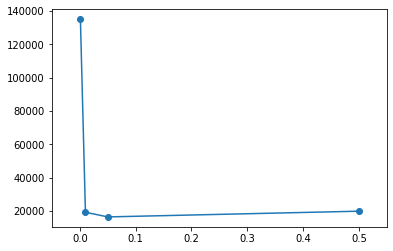

In [56]:
v = list(results2.values())
k = list(results2.keys())
plt.plot(k, v, marker='o')
plt.xlim(-0.05, 0.55)
# plt.ylim(1500,50000)
print('Best Score:' ,min(v))
plt.show()

In [57]:
print('Train_set:', X.shape, 'Test_set:', X_test.shape)

Train_set: (1460, 71) Test_set: (1459, 71)


## Prediction

In [66]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                              ('model',XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=0))
                             ])
pipeline.fit(X,y)

preds_test = pipeline.predict(X_test)

In [67]:
print(preds_test.shape)
preds_test

(1459,)


array([126743.12, 157031.34, 186978.31, ..., 165573.34, 117453.92,
       218348.75], dtype=float32)

In [68]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)